In [1]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
import scipy as sp

In [2]:
prob=lambda x: np.exp(-(x-1)**2)+np.exp(-(x-3)**2/2)
Prob=Funct(prob)
norm=Prob.Int(-1000,1000) # using extremes > some thousand the normalization goes to zero for numerical errors
PDF=lambda x: prob(x)/norm

func_mu=Funct(lambda x: x*PDF(x))
mu=func_mu.Int(-200,200) # 200 for numerical porpuses
func_sig=Funct(lambda x: PDF(x)*(x-mu)**2)
sig=np.sqrt(func_sig.Int(-200,200)) # 200 for numerical porpuses
gauss=lambda x: gaussian(x,mu,sig)

Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables


In [3]:
Xin=0
Xfin=8
Nint=1000000
sample_lin,eff_lin,win_lin=Rejection_sampling(PDF,Xin,Xfin,Nint)
sample_gauss,eff_gauss,win_gauss=Rejection_sampling(PDF,Xin,Xfin,Nint,type="gauss")
print('--------------------------------------------')
print("Efficiency of the linear sampling: ",eff_lin)
print("Efficiency of the gaussian sampling: ",eff_gauss)
print('--------------------------------------------')

Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables
--------------------------------------------
Efficiency of the linear sampling:  0.447403
Efficiency of the gaussian sampling:  0.715841
--------------------------------------------


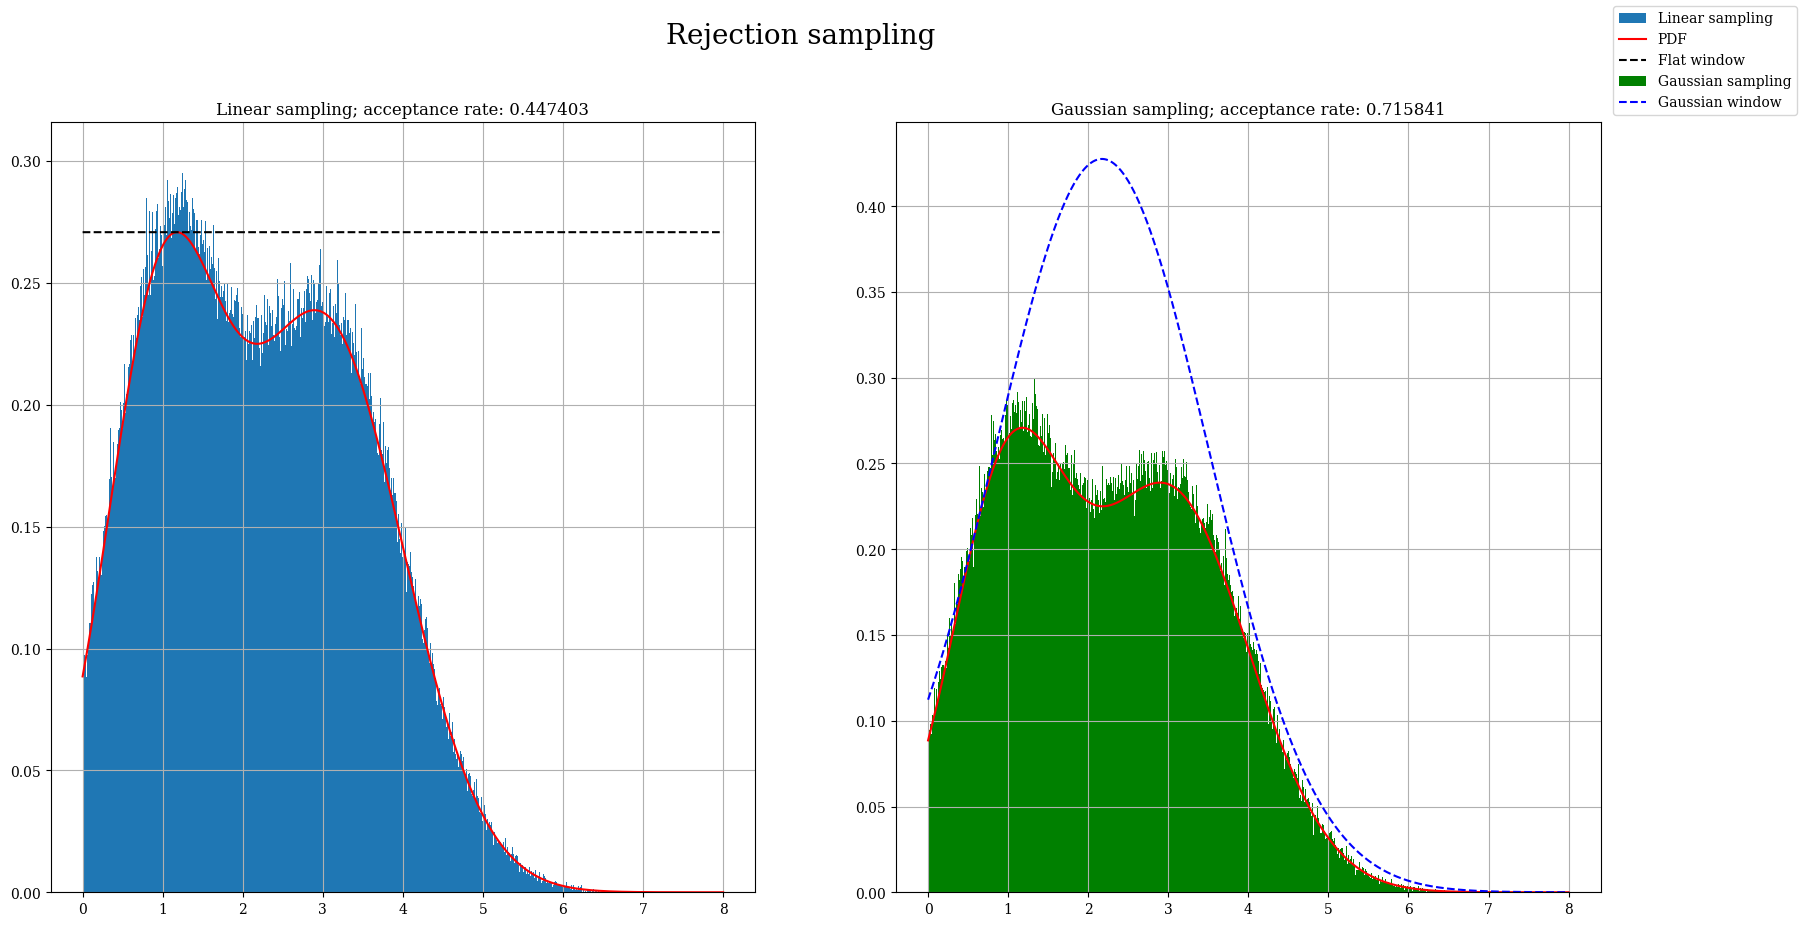

In [5]:
x=np.linspace(Xin,Xfin,sample_lin.size)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(sample_lin,bins=1000,density=True,label="Linear sampling");
ax[0].plot(x,PDF(x),label="PDF",color='red');
ax[0].plot(x,win_lin(x),label="Flat window",color='black',linestyle='--');
#ax[0].axhline(y=np.max(PDF(x)),label="Flat window",color='black',linestyle='--')
ax[0].set_title("Linear sampling; acceptance rate: "+str(eff_lin))
ax[0].grid()

ax[1].hist(sample_gauss,bins=1000,density=True,label="Gaussian sampling",color='green');
ax[1].plot(x,PDF(x),color='red');
ax[1].plot(x,win_gauss(x),label="Gaussian window",color='blue',linestyle='--');
#ax[1].plot(x,gauss_window(x),label="Gaussian window",color='blue',linestyle='--');
ax[1].set_title("Gaussian sampling; acceptance rate: "+str(eff_gauss))
ax[1].grid()

fig.suptitle("Rejection sampling",fontsize=20)
fig.legend()
